#LOAD THE DATASET FROM DRIVE

In [ ]:
!pip install gdown
import gdown

In [ ]:
dataset = '1oqkaO74p_YPsHY7LWWqG7Xhi727QKIq0'
url = f'https://drive.google.com/uc?id={dataset}'
output_path = '/dataset.csv'
gdown.download(url, output_path, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1oqkaO74p_YPsHY7LWWqG7Xhi727QKIq0
From (redirected): https://drive.google.com/uc?id=1oqkaO74p_YPsHY7LWWqG7Xhi727QKIq0&confirm=t&uuid=0bab6516-9830-4808-a53c-762693c0e52f
To: /dataset.csv
100%|██████████| 140M/140M [00:03<00:00, 35.8MB/s]


'/dataset.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, f_oneway
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from scipy.stats import ttest_ind

In [ ]:
dataset = pd.read_csv(output_path)
dataset.dtypes

,0
label,int64
text,object


In [ ]:
dataset.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [ ]:
dataset.isnull().sum()

,0
label,0
text,0


In [ ]:
dataset.describe()

,label
count,83448.000000
mean,0.526196
std,0.499316
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


Duplicate Values


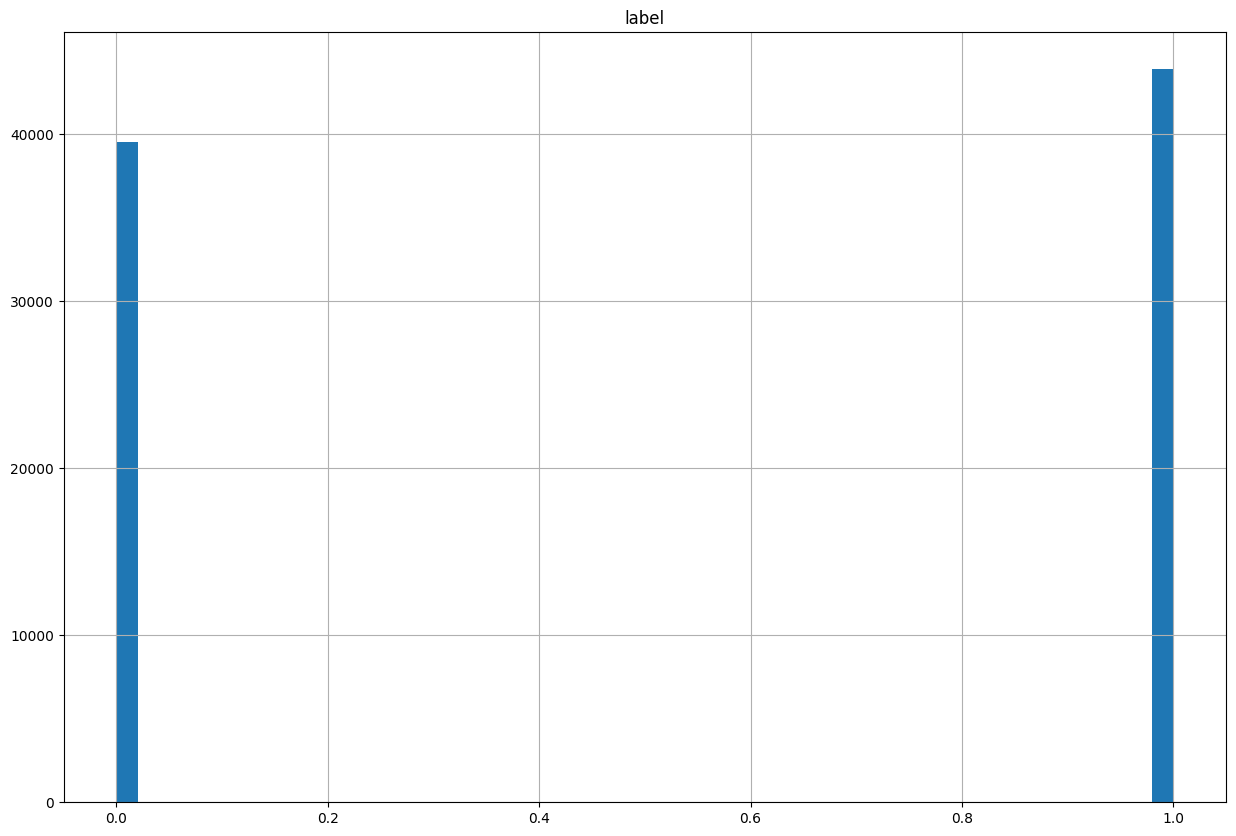

In [ ]:
dataset.hist(bins=50, figsize=(15, 10))
plt.show()

In [ ]:
numerical_columns = dataset.select_dtypes(include=['number']).columns

# Convert non-numeric values to NaN for all numerical columns
for column in numerical_columns:
    dataset[column] = pd.to_numeric(dataset[column], errors='coerce')

In [ ]:
dataset[numerical_columns].skew()

,0
label,-0.10493


In [ ]:
dataset[numerical_columns].kurtosis()

,0
label,-1.989037


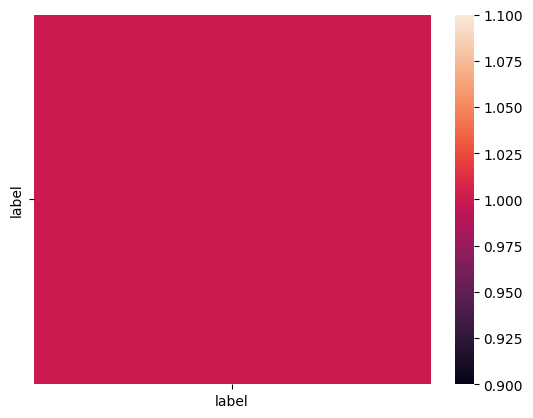

In [ ]:
corrmat = dataset[numerical_columns].corr()
round(corrmat,2)
sns.heatmap(corrmat);

In [ ]:
print(dataset['label'].value_counts())

label
1    43910
0    39538
Name: count, dtype: int64


In [ ]:
print(dataset['text'].value_counts())

text
unsubscribe                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

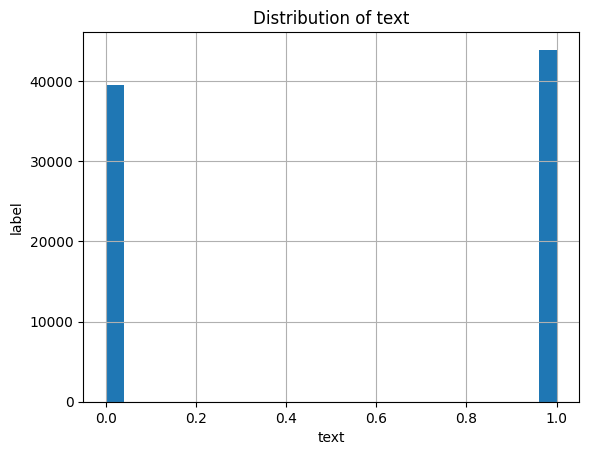

In [ ]:
dataset['label'].hist(bins=25)
plt.xlabel('text')
plt.ylabel('label')
plt.title('Distribution of text')
plt.show()

# **Apply RNN**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, RNN, Embedding

In [ ]:
dataset_train = dataset.sample(frac=.8, random_state=11)
dataset_test = dataset.drop(dataset_train.index)
print(dataset_train.shape, dataset_test.shape)

(66758, 2) (16690, 2)


In [ ]:
y_train = dataset_train['label'].values
y_test = dataset_test['label'].values
y_test.shape

(16690,)

In [ ]:
X_train = dataset_train['text'].values
X_test = dataset_test['text'].values

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
word_dict = tokenizer.index_word

In [ ]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
print(X_train_seq[:5])
print(dataset_train.iloc[0,:])
for el in X_train_seq[0]:
    print(word_dict[el], end=' ')

[[344, 36, 12, 147, 3, 421, 12875, 69, 12, 337, 3, 111, 13, 10362, 7, 63, 76, 214, 2, 284, 510, 40, 12, 79, 428, 3, 210, 1282, 970, 40, 48, 10362, 2460, 4, 31, 12, 147, 3, 4785, 10362, 405, 7, 431, 1022, 427, 23455, 14, 8, 4, 465, 946, 27, 4893, 3, 421, 61, 2460, 225, 120, 12, 421, 13, 2460, 47, 402, 1, 10362, 11, 41, 106299, 9, 12875, 71, 11, 109, 1036, 2275, 9, 2, 284, 1, 9366, 2, 3486, 618, 4, 2612, 3, 421, 10362, 1, 11, 650, 3132, 2, 2460, 157, 75153], [212, 136, 241, 25, 2, 9005, 5, 37, 54, 261, 705, 764, 4, 143, 3636, 1, 29, 22, 378, 534, 9, 10, 619, 9, 20, 191, 20, 1, 1, 70, 1570, 901, 1573, 619, 9, 20, 191, 20, 1, 1, 70, 1570, 2034, 9, 20, 191, 20, 1, 1, 70, 1570, 4, 197, 197, 44, 378, 534, 242, 10, 112, 1, 745, 3, 18, 919, 9, 748, 36, 1082, 481, 23, 229, 619, 901, 2034, 4494, 4, 197, 197, 44, 130, 987, 5817, 48, 1607, 3446, 48, 3250, 1, 406, 6309, 82, 3, 341, 37, 54, 1151, 22, 6, 1187, 136], [2589, 1764, 14198, 829, 4334, 153, 2569, 9157, 57, 2813, 9049, 1292, 705, 3983, 29, 2

In [ ]:
X_train_pad = pad_sequences(X_train_seq, maxlen=20, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=20, padding='post')
X_train_pad[:5]
X_train_pad.shape

(66758, 20)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

In [ ]:
laenge_pads = 20
anz_woerter = 7982

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=anz_woerter+1, output_dim=20, input_length=laenge_pads))
lstm_model.add(LSTM(400))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:

laenge_pads = 20
# Update anz_woerter to include all possible words in train and test data
anz_woerter = len(tokenizer.word_index)

lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=anz_woerter + 1, output_dim=20, input_length=laenge_pads))
lstm_model.add(LSTM(400))
lstm_model.add(Dense(1, activation='sigmoid'))

lstm_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = lstm_model.fit(X_train_pad, y_train, epochs=2, batch_size=64,
                        validation_data=(X_test_pad, y_test))


Epoch 1/2
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 359s 337ms/step - accuracy: 0.8948 - loss: 0.2337 - val_accuracy: 0.9696 - val_loss: 0.0823
Epoch 2/2
1044/1044 ━━━━━━━━━━━━━━━━━━━━ 333s 291ms/step - accuracy: 0.9870 - loss: 0.0406 - val_accuracy: 0.9695 - val_loss: 0.0836


In [ ]:
y_test_pred = lstm_model.predict(X_test_pad)
y_test_pred.shape

522/522 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step


(16690, 1)

In [ ]:
y_test

array([1, 0, 1, ..., 1, 0, 1])

#Apply Transformer

In [ ]:
!pip install datasets
!pip install transformers
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.9/484.9 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.1 MB/s eta 0:00:00


In [ ]:
dataset = '1oqkaO74p_YPsHY7LWWqG7Xhi727QKIq0'
url = f'https://drive.google.com/uc?id={dataset}'
output_path = '/dataset.csv'
gdown.download(url, output_path, quiet=False)

In [ ]:
dataset = dataset[["label","text"]]

In [ ]:
dataset

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...
...,...,...
83443,0,hi given a date how do i get the last date of ...
83444,1,now you can order software on cd or download i...
83445,1,dear valued member canadianpharmacy provides a...
83446,0,subscribe change profile contact us long term ...


In [ ]:
dataset['label'] = dataset['label'].map({'ham': 0, 'spam': 1})

In [ ]:
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import TrainingArguments,Trainer
training_args = TrainingArguments(output_dir="test_trainer")


In [ ]:
import numpy as np
import evaluate
metric = evaluate.load("accuracy")

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

from datasets import Dataset
train_dataset = Dataset.from_pandas(dataset)

def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = train_dataset.map(preprocess_function, batched=True)

from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased',num_labels=2)

from transformers import TrainingArguments,Trainer
training_args = TrainingArguments(output_dir="test_trainer")

import numpy as np
import evaluate
metric = evaluate.load("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Split the dataset into train and evaluation sets
tokenized_datasets = tokenized_datasets.train_test_split(test_size=0.2)
# Rename the splits to match the expected names by the Trainer
tokenized_datasets_train = tokenized_datasets['train']
tokenized_datasets_eval = tokenized_datasets['test']

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets_train,
    eval_dataset=tokenized_datasets_eval,
    compute_metrics=compute_metrics,
)

Map:   0%|          | 0/83448 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:

from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from datasets import Dataset
import pandas as pd
import numpy as np
import evaluate

# Define TrainingArguments
training_args = TrainingArguments(output_dir="test_trainer")

# Load tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModelForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Load metric
metric = evaluate.load("accuracy")

# Define compute_metrics function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Load dataset and preprocess
dataset = pd.read_csv('/dataset.csv')  # Assuming you have already downloaded and saved the dataset
dataset = dataset[["label", "text"]]
dataset['label'] = dataset['label'].map({'ham': 0, 'spam': 1})
train_dataset = Dataset.from_pandas(dataset)

def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

tokenized_datasets = train_dataset.map(preprocess_function, batched=True)

# Split the dataset
tokenized_datasets = tokenized_datasets.train_test_split(test_size=0.2)
tokenized_datasets_train = tokenized_datasets['train']
tokenized_datasets_test = tokenized_datasets['test'] # Assign the test split to tokenized_datasets_test

# Define/Initialize the Trainer
trainer = Trainer( # This was missing from the original code in cell 14
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets_train,
    eval_dataset=tokenized_datasets_test,
    compute_metrics=compute_metrics,
)

# Now you can make predictions
predictions_output = trainer.predict(tokenized_datasets_test) # Using tokenized_datasets_test instead of tokenizer_datasets_test
accuracy_score = compute_metrics((predictions_output.predictions, tokenized_datasets_test['label'])) # Using tokenized_datasets_test instead of tokenizer_datasets_test
print(accuracy_score)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/83448 [00:00<?, ? examples/s]